# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import TransformedTargetRegressor


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Preprocessing

In [2]:
# Read Data
train_full_raw = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv', index_col='Id')
test_full_raw = pd.read_csv('/kaggle/input/home-data-for-ml-course/test.csv', index_col='Id')

In [3]:
train_full = train_full_raw.copy()
test_full = test_full_raw.copy()

print(f"Train_full_raw.shape: {train_full.shape}")
print(f"Test_full_raw.shape: {test_full.shape}")

Train_full_raw.shape: (1460, 80)
Test_full_raw.shape: (1459, 79)


## Descriptive Data

In [4]:
train_full.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_full.describe(include='all')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,5,NaN,NaN,2,2,4,4,2,5,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


## Select Target Variable (SalePrice)

In [6]:
# Remove rows with missing target, separate target from predictors
train_full.dropna(axis=0, subset=['SalePrice'], inplace=True)

y = train_full['SalePrice'].copy()

train_full.drop(['SalePrice'], axis=1, inplace=True)

# Exploratory Data Analysis 

## Visualiza  Target Variable (SalePrice)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


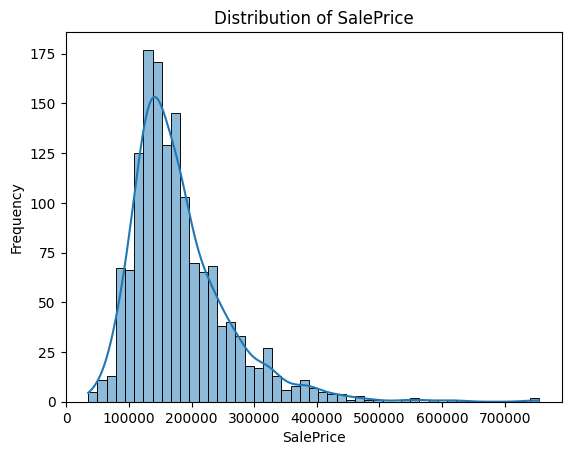

In [7]:
sns.histplot(y, kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

### The Distribution of `SalePrice` is right-skewd -> Apply log transformation using `np.log1p()` to make the data more normally distributed.

1. Lower the skewness for better model assumptions.

2. Decrease the impact of extreme values (e.g., luxury houses) on the model.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


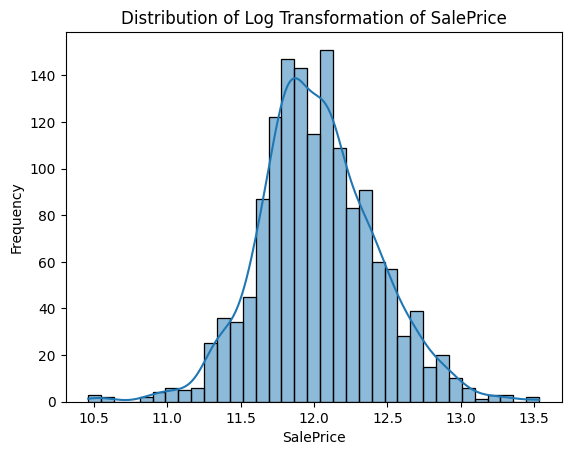

In [8]:
# log1p(x) avoids floating-point precision errors when x is near 0.
# y = np.log1p(y)

sns.histplot(np.log1p(y), kde=True)
plt.title('Distribution of Log Transformation of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

## Check for Missing Values & Visualize

In [9]:
missing_values_check = train_full.isnull().sum().sort_values(ascending=False)
missing_values_check[missing_values_check > 0]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageQual        81
GarageFinish      81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

In [10]:
missing_values_600 = missing_values_check[missing_values_check > 600]
missing_values_600

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
FireplaceQu     690
dtype: int64

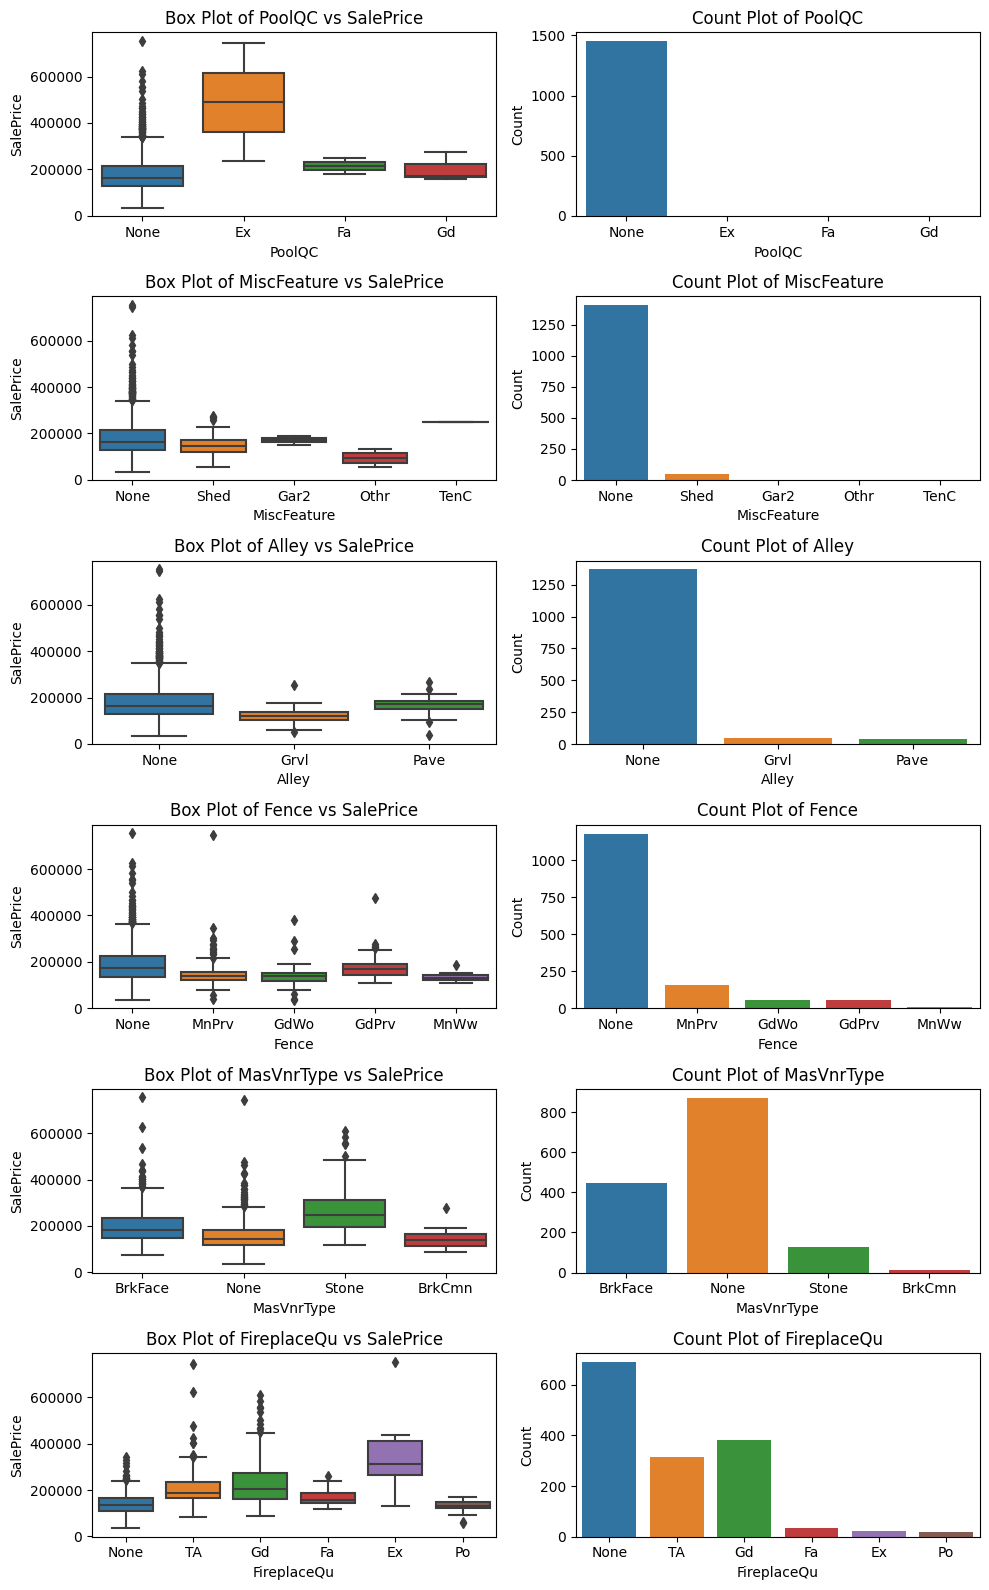

In [11]:
missing_values_600_list = missing_values_600.index.to_list()

fig, axes = plt.subplots(6, 2, figsize=(10, 16))  
axes = axes.flatten()  # Convert to a 1D array for easier indexing

for i, feature in enumerate(missing_values_600_list):
    sns.boxplot(x=train_full[feature].fillna('None'), y=y, ax=axes[2 * i])
    axes[2 * i].set_title(f"Box Plot of {feature} vs SalePrice")
    axes[2 * i].set_xlabel(feature)
    axes[2 * i].set_ylabel('SalePrice')

    sns.countplot(x=train_full[feature].fillna('None'), ax=axes[2 * i + 1])
    axes[2 * i + 1].set_title(f"Count Plot of {feature}")
    axes[2 * i + 1].set_xlabel(feature)
    axes[2 * i + 1].set_ylabel("Count")
    
plt.tight_layout()

plt.savefig("Box_Count_plot_of_missing_values.png", dpi=300, bbox_inches='tight')
plt.show()

### ✅ Summary 1-1: Features with Quality Levels (Apply Imputation + Ordinal Encoding + Binary Indicator)
`PoolQC`
Most houses do not have a pool, and these tend to have the lowest sale prices. When a pool is present, higher pool quality is associated with higher sale prices.


`MasVnrType`
Houses with stone veneer tend to have higher sale prices. Although the types are categorical, they reflect material quality, which may relate to value.


`FireplaceQu`
Not every house has a fireplace, but when present, better fireplace quality correlates with higher sale prices, as observed in box plots.

→ Apply missing value imputation (fill with 'None') + ordinal encoding + create a binary feature to indicate presence (HasPool, HasMasonryVeneer, HasFireplace).

### ✅ Summary 1-2: Features with Sparse Categories (Apply Imputation + Binary Indicator)
`MiscFeature`
Miscellaneous features (e.g., sheds, tennis courts) do not appear to significantly affect sale prices.

`Alley`
The presence of alley access has no clear impact on sale prices. This feature is also highly sparse.


`Fence`
Although fence quality has nominal values, it shows no consistent influence on sale price and contains many missing values.

→ Apply missing value imputation (fill with 'None') + create binary features (HasMiscFeature, HasAlley, HasFence) to indicate presence.

# Break off validation set from training data

In [12]:
X_train, X_valid, y_train, y_valid = train_test_split(train_full, y, test_size=0.2, random_state=0)

print(f"Size of Train data = {X_train.shape, y_train.shape}")
print(f"Size of Validation data = {X_valid.shape, y_valid.shape}")

Size of Train data = ((1168, 79), (1168,))
Size of Validation data = ((292, 79), (292,))


# Feature Engineering

## Features with Quality Levels Transformer (Apply Imputation + Ordinal Encoding + Binary Indicator)

In [13]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OrdinalEncoder

class QualityTransformer(BaseEstimator, TransformerMixin):

    def __init__(self, columns, category_order_dict):
        self.columns = columns
        self.category_order_dict = category_order_dict
        self.encoders = {}  # 儲存每個欄位各自的 OrdinalEncoder

    def fit(self, X, y=None):
        for col in self.columns:
            categories = [self.category_order_dict[col]]  
            oe = OrdinalEncoder(categories=categories)
            oe.fit(X[[col]].fillna('None'))  # 補 'None' 後訓練編碼器
            self.encoders[col] = oe  # 儲存 encoder
        return self

    def transform(self, X):
        X_ = X.copy()
        output = []
        for col in self.columns:
            col_filled = X_[[col]].fillna('None')
            
            # Ordinal encoding → 覆蓋原欄位
            encoded = self.encoders[col].transform(col_filled)
            X_[col] = encoded
            
            # 新增 binary 欄位
            X_[f'Has{col}'] = (col_filled != 'None').astype(int).values
        return X_  
        # 原欄位是有意義的品質分數，要被模型學習
        # 如果只 return X_[self.columns]，會漏掉剛剛加上的 HasPoolQC、HasFireplaceQu 等欄位 
    
    def get_feature_names_out(self, input_features=None):
        return np.array(
            self.columns + [f'Has{col}' for col in self.columns]
        )

## Features with Sparse Categories Transformer (Apply Imputation + Binary Indicator)

In [14]:
class PresenceOnlyTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns

    def fit(self, X, y=None):
        if self.columns is None:
            self.columns = list(X.columns)
        return self

    def transform(self, X):
        X_ = X.copy()
        for col in self.columns:
            col_filled = X_[[col]].fillna('None')
            X_[f'Has{col}'] = (col_filled != 'None').astype(int).values
        return X_[[f'Has{col}' for col in self.columns]]

    def get_feature_names_out(self, input_features=None):
        return np.array([f'Has{col}' for col in self.columns])

## Selected Categorical & Numerical Columns

In [15]:
quality_cols = ['PoolQC', 'FireplaceQu', 'MasVnrType']
presence_cols = ['Fence', 'Alley', 'MiscFeature']

raw_cat_cols = X_train.select_dtypes(include='object').columns.tolist()
raw_num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

numerical_cols = [col for col in raw_num_cols if col not in quality_cols + presence_cols + ['Id']]
categorical_cols = [col for col in raw_cat_cols if col not in quality_cols + presence_cols]

* 排除 ['Id'] 因為它是純識別碼，不具備解釋力，還可能造成模型 overfitting

* 模型可能過度學習 Id，失去泛化能力

## Explore Numerical Features
不是為了直接「決定是否保留特徵」，而是屬於 EDA（探索性資料分析）的一部分，用來「了解資料特性」。

In [16]:
# Compute correlation matrix
correlation_matrix = X_train[numerical_cols].corrwith(y).sort_values(ascending=False).to_frame(name='Correlation')
correlation_matrix

,Correlation
OverallQual,0.790636
GrLivArea,0.721707
GarageCars,0.660927
GarageArea,0.646603
TotalBsmtSF,0.635535
1stFlrSF,0.620740
FullBath,0.578134
TotRmsAbvGrd,0.542658
YearBuilt,0.521242
YearRemodAdd,0.517822


In [17]:
correlation_matrix.values.mean()

0.2848370439363906

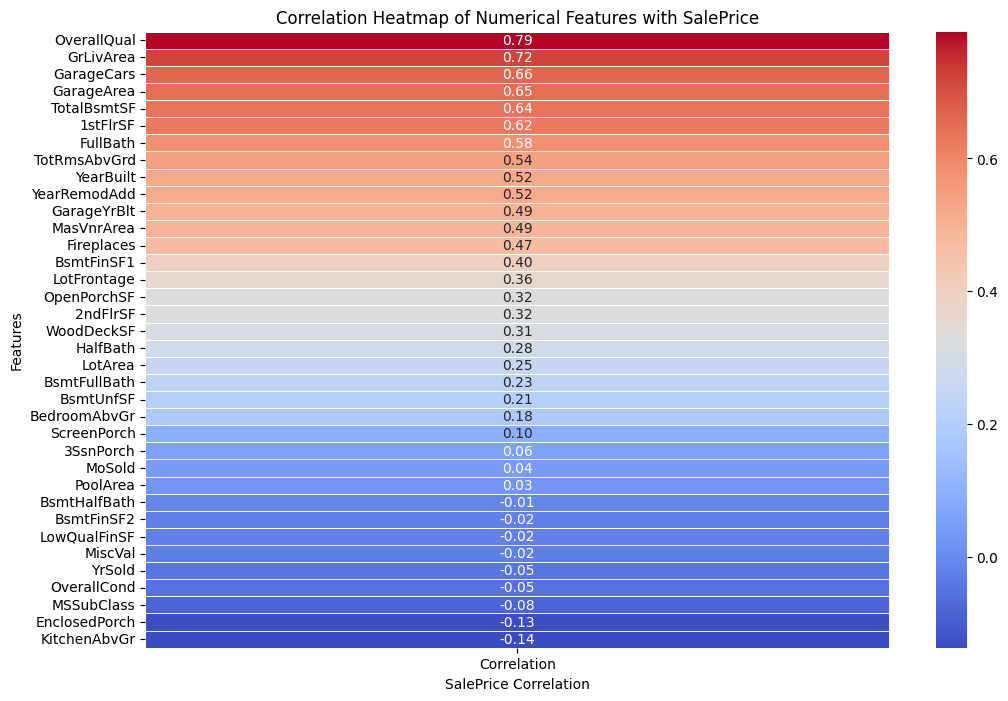

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

plt.title('Correlation Heatmap of Numerical Features with SalePrice')
plt.xlabel('SalePrice Correlation')
plt.ylabel('Features')

plt.savefig("Heatmap_of_NumericalFeatures.png", dpi=300, bbox_inches='tight')


plt.show()

## Explore Categorical Features

**Cardinality of Categorical Features**

- High-cardinality categorical columns can impact model performance and need appropriate encoding strategies.

- **Cardinality alone is not a reason to drop features**, but it helps us decide **how to encode** them properly.


| Cardinality Range      | Encoding Strategy                                       | Remarks                              |
|------------------------|---------------------------------------------------------|--------------------------------------|
| **< 10**               | ✅ One-Hot Encoding                                     | Safe and effective for most models   |
| **10 – 30**            | 🔁 One-Hot (if needed) or Frequency Encoding / Grouping | Consider merging rare categories     |
| **> 30**               | 🎯 Target Encoding / Frequency Encoding / Rare Labeling | Avoid One-Hot due to high sparsity   |


In [19]:
cat_cardinality = X_train[categorical_cols].nunique().sort_values(ascending=False).to_frame(name='Cardinality')
cat_cardinality.index.name = 'Feature'
cat_cardinality

,Cardinality
Feature,
Neighborhood,25
Exterior2nd,16
Exterior1st,15
SaleType,9
Condition1,9
HouseStyle,8
RoofMatl,7
Foundation,6
GarageType,6


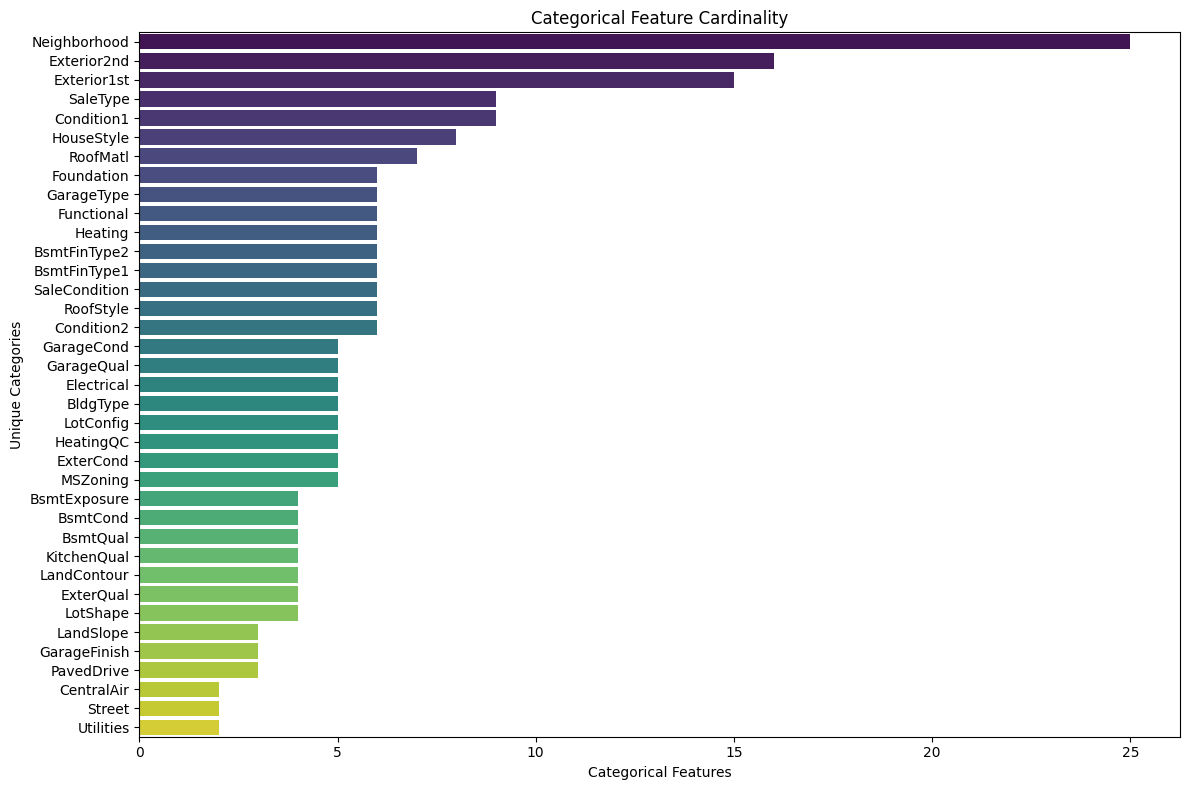

In [20]:
plt.figure(figsize=(12, 8))
sns.barplot(x=cat_cardinality['Cardinality'], y=cat_cardinality.index, palette='viridis')

plt.title('Categorical Feature Cardinality')
plt.ylabel('Unique Categories')
plt.xlabel('Categorical Features')
plt.tight_layout()

plt.savefig("Barplot_of_Cardinality.png", dpi=300, bbox_inches='tight')
plt.show()

### Summary

The cardinalities of `Neighborhood`, `Exterior2nd`, `Exterior1st` are between 10 and 30
-> Frequency Encode.
	
	


## Frequency Encode Transformer for High Cardinality Features

In [21]:
class FrequencyEncodeTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
        self.freq_maps = {}

    def fit(self, X, y=None):
        if self.columns is None:
            self.columns = list(X.columns)
            
        for col in self.columns:
            self.freq_maps[col] = X[col].value_counts(normalize=True)
        return self

    def transform(self, X):
        X_ = X.copy()
        for col in self.columns:
            X_[col] = X_[col].map(self.freq_maps[col]).fillna(0)
        return X_[self.columns]

    def get_feature_names_out(self, input_features=None):
        return np.array(self.columns)


# Pipeline

In [22]:
CATEGORY_ORDER = {
    'PoolQC': ['None', 'Fa', 'Gd', 'Ex'],
    'FireplaceQu': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'MasVnrType': ['CBlock', 'BrkCmn', 'None', 'BrkC', 'BrkFace', 'Stone']
}
quality_levels_col = ['PoolQC', 'FireplaceQu', 'MasVnrType']
presence_only_col = ['MiscFeature', 'Alley', 'Fence']
high_cardinality_col = ['Neighborhood', 'Exterior2nd', 'Exterior1st']
categorical_cols = [col for col in categorical_cols if col not in high_cardinality_col]


# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  
    ('scaler', StandardScaler())])

# Preprocessing for categorical data 
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing for features with quality levels
quality_transformer = Pipeline(steps=[
    ('quality_trans', QualityTransformer(quality_levels_col, CATEGORY_ORDER))
])

# Preprocessing for features with presence only 
presence_transformer = Pipeline(steps=[
    ('presence_trans', PresenceOnlyTransformer())
])

# Preprocessing for features with high cardinality

cardinality_transformer = Pipeline(steps=[
    ('cardinality_trans', FrequencyEncodeTransformer())
])


# Bundle preprocessing transformers
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols),
    ('quality', quality_transformer, quality_levels_col),
    ('presence', presence_transformer, presence_only_col),
    ('high_card', cardinality_transformer, high_cardinality_col)
])

# Model

In [23]:
model = RandomForestRegressor(n_estimators=150, random_state=0)

# Bundle preprocessing and modeling code into a single pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])

# 包成處理過 target 的 pipeline: 將 target 取 log
model_with_log_target = TransformedTargetRegressor(
    regressor=clf,
    func=np.log1p,        # 轉換 y（train 時）
    inverse_func=np.expm1 # 預測時還原 y
)

model_with_log_target.fit(X_train, y_train)
preds = model_with_log_target.predict(X_valid)

In [24]:
from sklearn.metrics import r2_score

r2 = r2_score(y_valid, preds)

print(f"Mean Absolute Error of Random Forest = {mean_absolute_error(y_valid, preds)}")
print(f"R^2 Score: {r2:.2f}")

Mean Absolute Error of Random Forest = 17449.28112912753
R^2 Score: 0.85


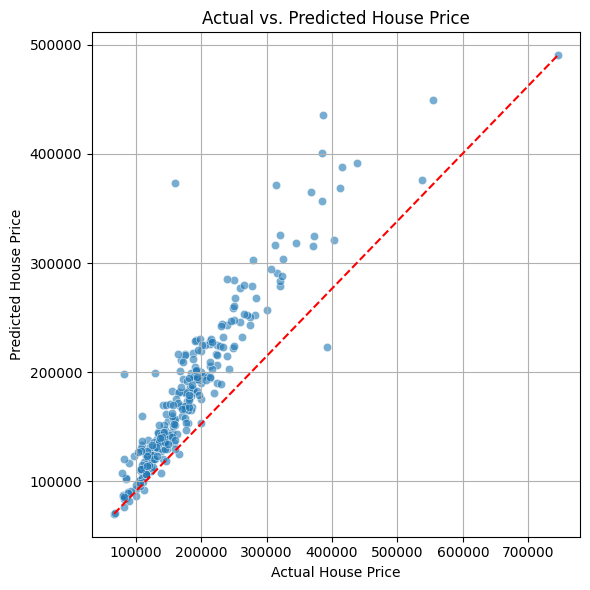

In [25]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_valid, y=preds, alpha=0.6)
plt.plot([y_valid.min(), y_valid.max()], [preds.min(), preds.max()], color='red', linestyle='--')
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("Actual vs. Predicted House Price")

plt.grid(True)
plt.tight_layout()

plt.savefig("Final.png", dpi=300, bbox_inches='tight')

plt.show()

# Test Model with Test.csv

In [26]:
test_preds = model_with_log_target.predict(test_full) 

test_preds[:5]

array([126553.93459471, 150455.74639012, 180017.86067404, 179984.00998397,
       196694.90001678])

In [27]:
output = pd.DataFrame({'Id': test_full.index,
                       'SalePrice': test_preds})

output.to_csv('submission.csv', index=False)

# References
1. [Missing Values Data Visualization](https://www.kaggle.com/code/yaroslav53/housing-prices?kernelSessionId=155403570)